# Saurabh Kumar | ESET0128  |   Advance Python AIML DAY:9

## Task Day9: EDA on Delhi Climate Data

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

In [21]:
# Load Dataset
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [22]:
# Convert Date Column to Datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').set_index('date')

In [23]:
# Basic Info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None

Missing Values:
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

First 5 Rows:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [24]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe().T)


Statistical Summary:
               count         mean         std        min          25%  \
meantemp      1462.0    25.495521    7.348103   6.000000    18.857143   
humidity      1462.0    60.771702   16.769652  13.428571    50.375000   
wind_speed    1462.0     6.802209    4.561602   0.000000     3.475000   
meanpressure  1462.0  1011.104548  180.231668  -3.041667  1001.580357   

                      50%          75%          max  
meantemp        27.714286    31.305804    38.714286  
humidity        62.625000    72.218750   100.000000  
wind_speed       6.221667     9.238235    42.220000  
meanpressure  1008.563492  1014.944901  7679.333333  


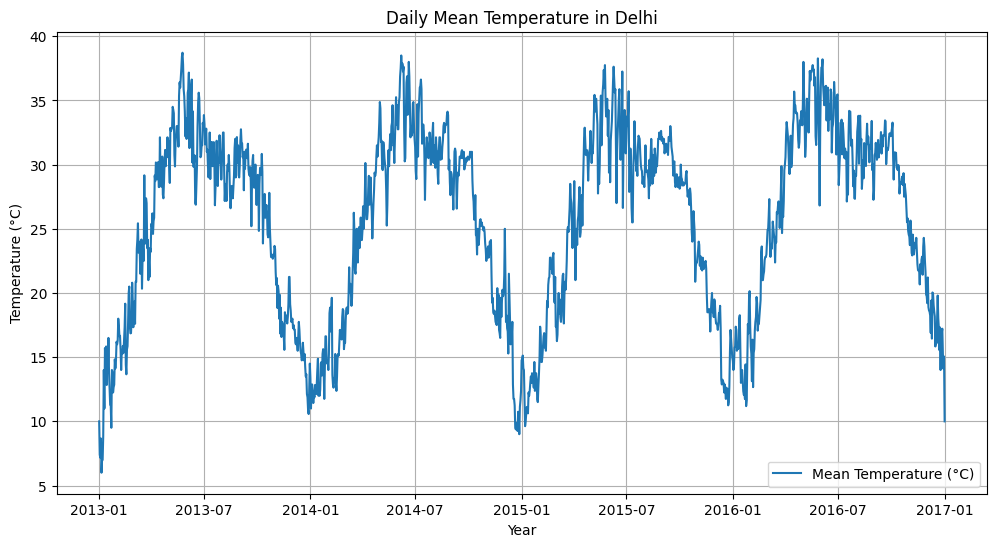

In [25]:
df = df.ffill()

# Plotting Overall Trends
plt.figure(figsize=(12,6))
plt.plot(df.index, df['meantemp'], label='Mean Temperature (°C)')
plt.title("Daily Mean Temperature in Delhi")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

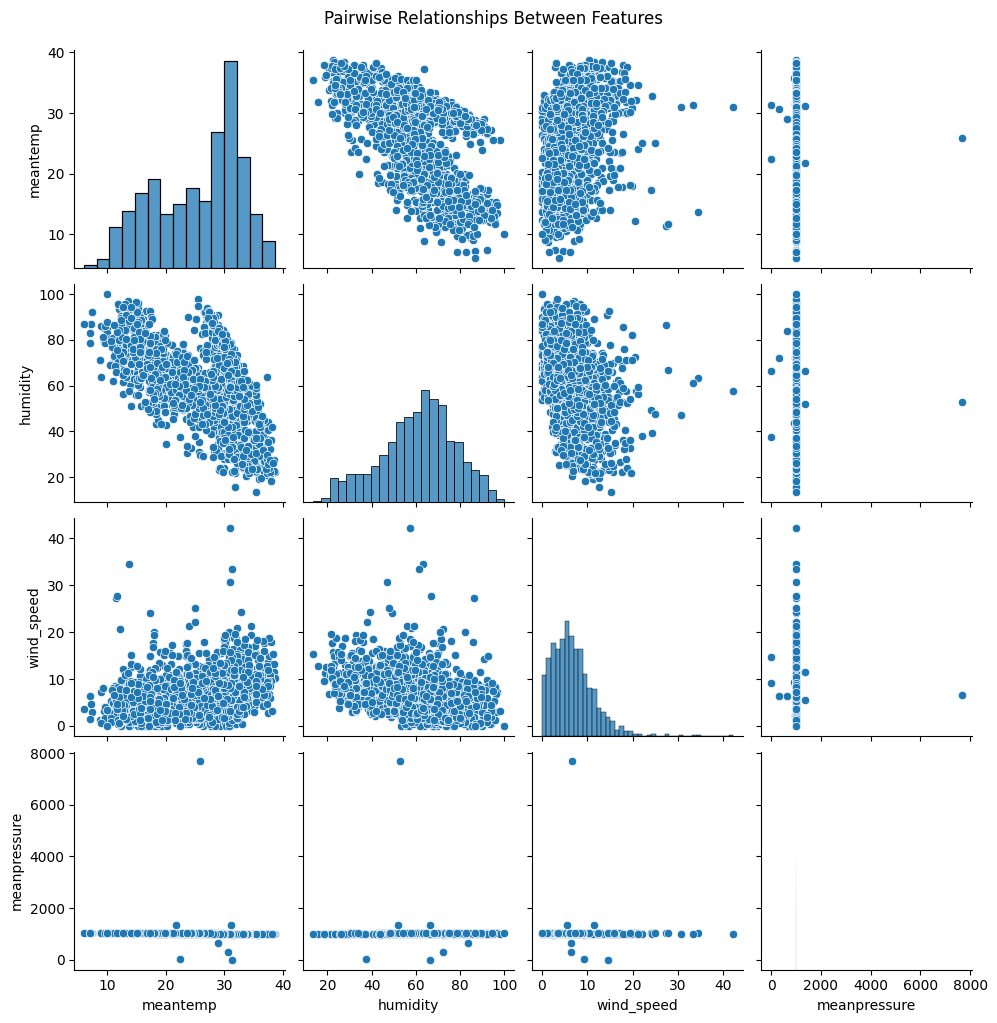

In [26]:
# Pairwise Relationships
sns.pairplot(df)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

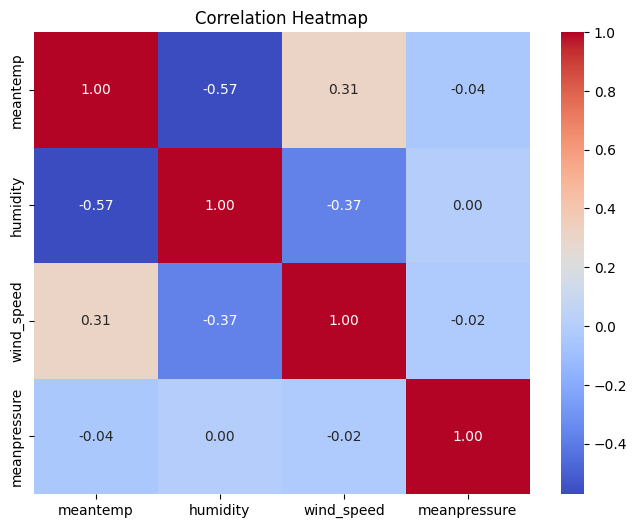

In [27]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

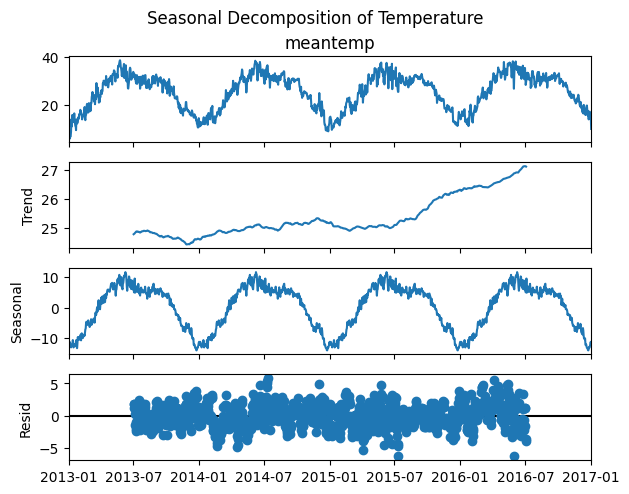

In [28]:
# Seasonal Decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)
result.plot()
plt.suptitle("Seasonal Decomposition of Temperature", y=1.02)
plt.show()

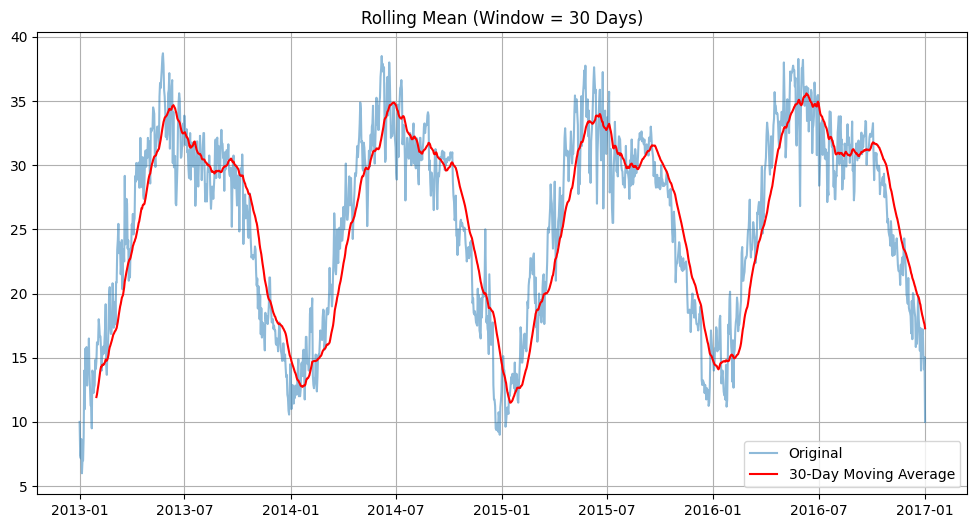

In [29]:
# Rolling Statistics
window_size = 30
plt.figure(figsize=(12,6))
plt.plot(df['meantemp'], label='Original', alpha=0.5)
plt.plot(df['meantemp'].rolling(window_size).mean(), label=f'{window_size}-Day Moving Average', color='red')
plt.title(f"Rolling Mean (Window = {window_size} Days)")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Interactive Trend Plot
fig = px.line(df, x=df.index, y='meantemp', title='Interactive Temperature Trend')
fig.show()

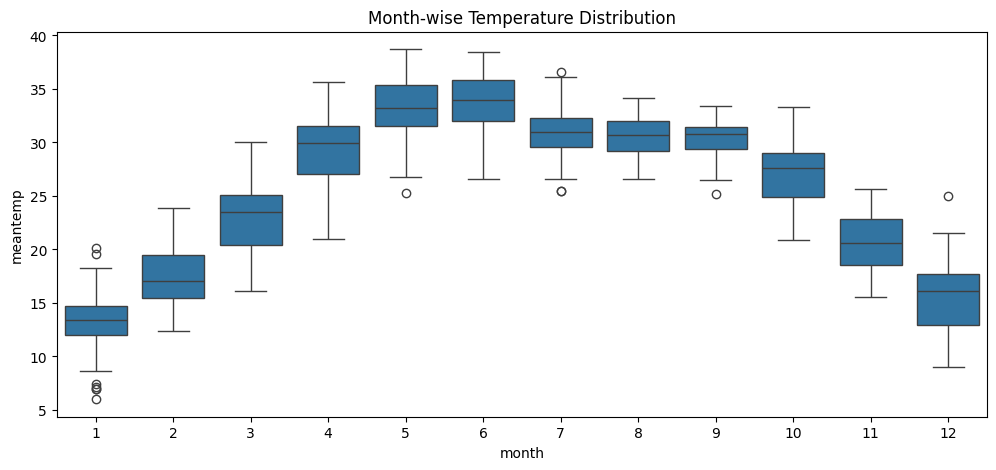

In [31]:
# Month-wise and Year-wise Aggregations
df['month'] = df.index.month
df['year'] = df.index.year

plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='meantemp', data=df)
plt.title("Month-wise Temperature Distribution")
plt.show()

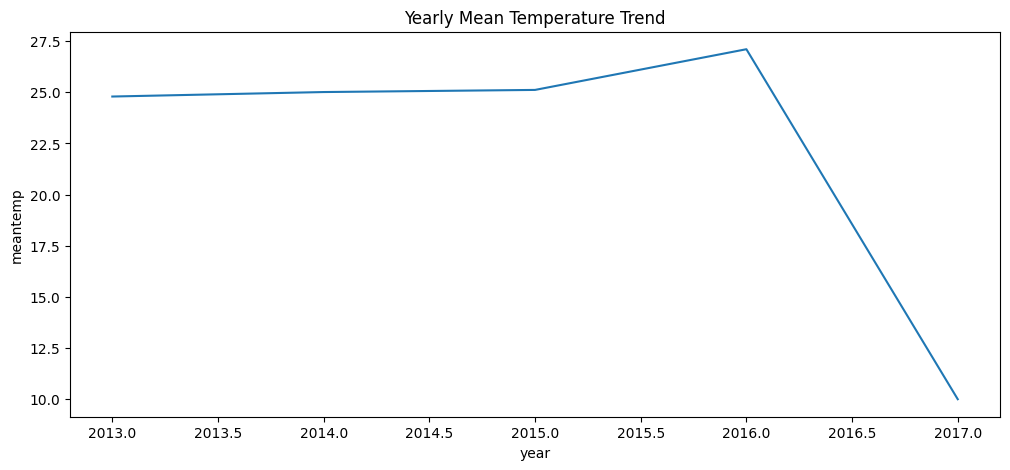

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year', y='meantemp', data=df, ci=None)
plt.title("Yearly Mean Temperature Trend")
plt.show()

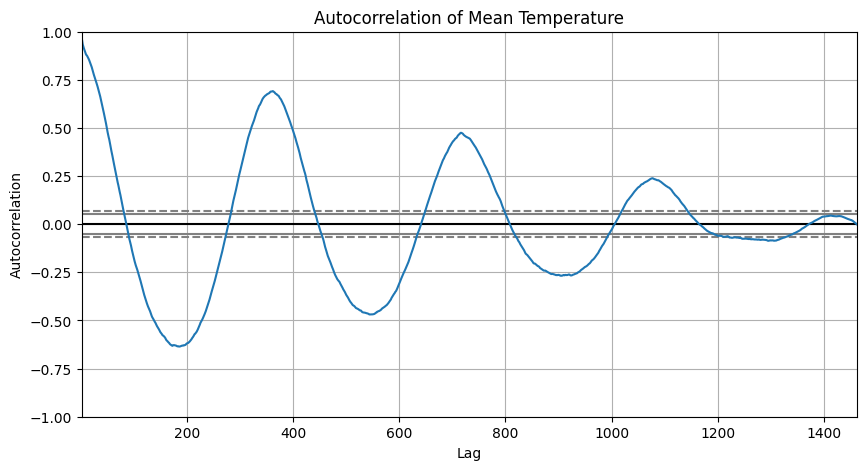

In [33]:
# Autocorrelation for temperature
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
autocorrelation_plot(df['meantemp'])
plt.title("Autocorrelation of Mean Temperature")
plt.show()